# **Linear Regression**

## **Session Outline**
1. Load the California Housing Dataset
2. Data Analysis and Preprocessing - data statistics, correlation matrix, feature scaling (normalization).
3. Split Data into Training, Validation, and Test Sets
4. Implement Linear Regression from Scratch Using Gradient Descent
5. Perform Linear Regression Using the Least Squares Method (Normal Equation)
6. Fit a Linear Regression Model Using Scikit-learn
7. Illustrate Overfitting and Underfitting


### Import Libraries

In [ ]:
# Basic Imports
import numpy as np
import pandas as pd
from numpy.linalg import inv

# Plotting Libraried
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset from skLearn
from sklearn.datasets import fetch_california_housing

# Some Processing Functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


### Loading Dataset

In [ ]:
# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target
X.shape

(20640, 8)

In [ ]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

#### Converting to Dataframe

In [ ]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y
print(df.head());

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Missing values per column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

Number of duplicate rows:
0


In [ ]:
# Summary statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Matrix Correlation

Target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64


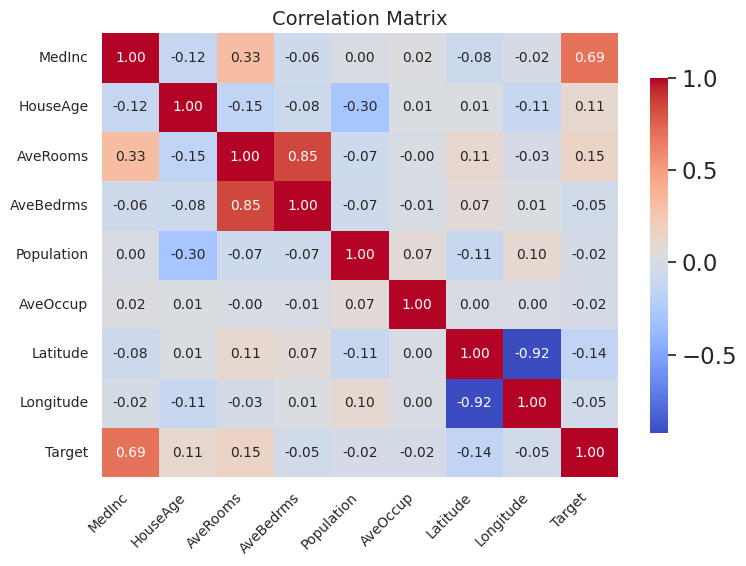

In [ ]:
corr_matrix = df.corr()
print(corr_matrix['Target'].sort_values(ascending=False))

# Plot correlation matrix with readable text
plt.figure(figsize=(8, 6))  # Slightly larger for clarity
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size": 10},     # Annotation font size
    cbar_kws={"shrink": 0.8}    # Shrink colorbar for aesthetics
)
plt.xticks(fontsize=10, rotation=45, ha='right')  # X-axis labels
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

### Feature Plotting

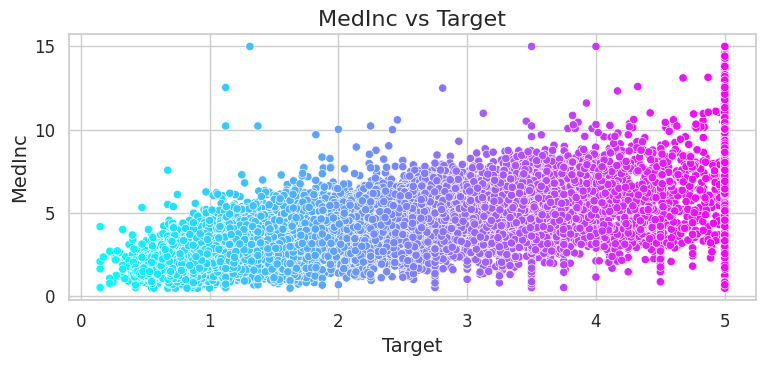

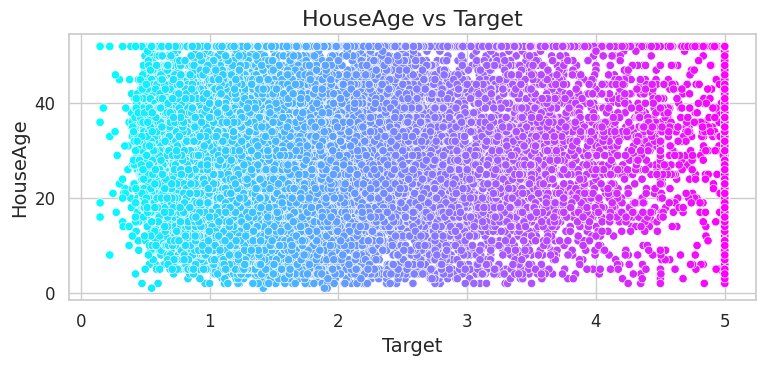

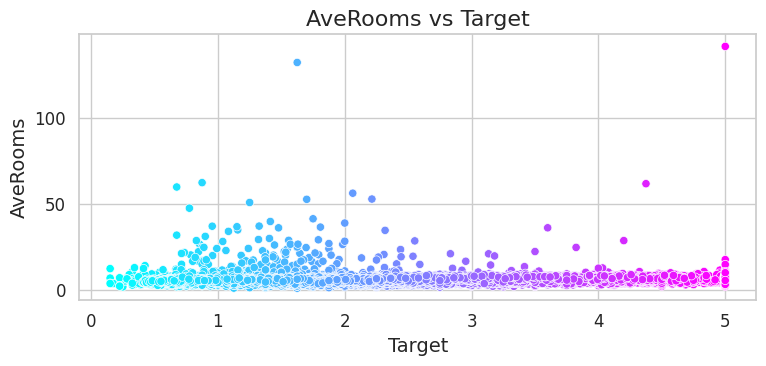

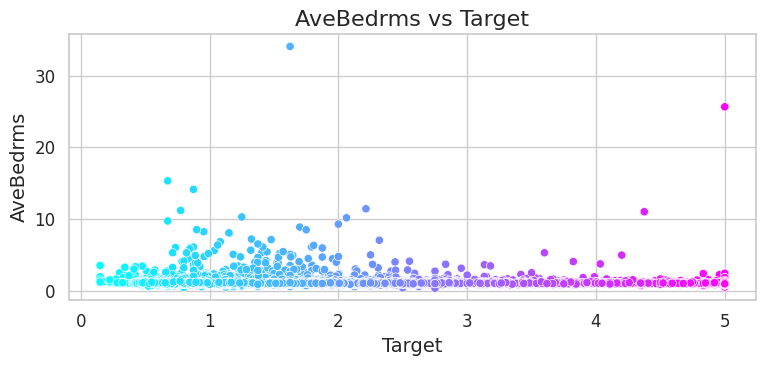

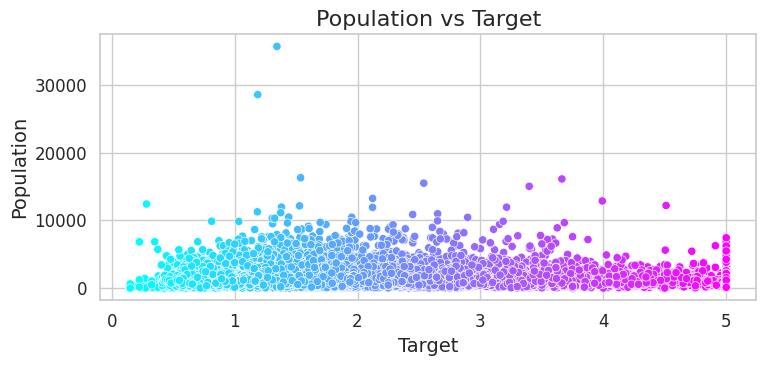

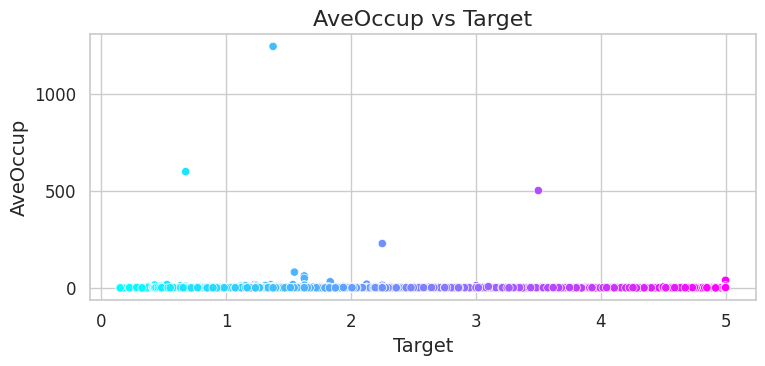

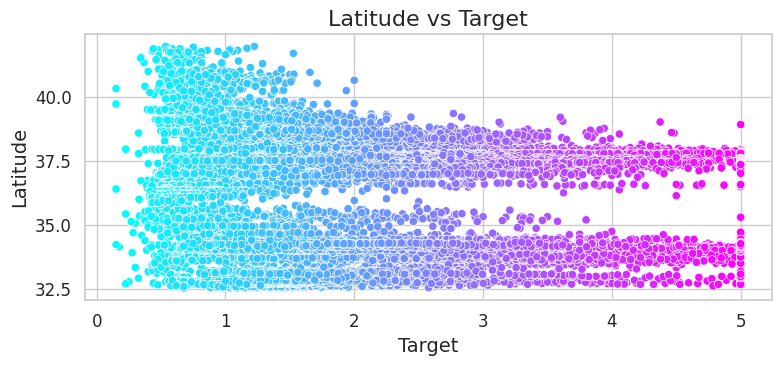

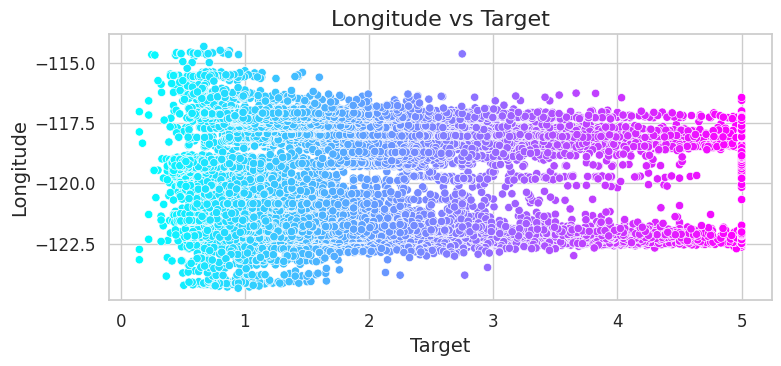

In [ ]:
#using sns for visualization
sns.set_style('whitegrid')  # already good
sns.set_context('notebook', font_scale=1.5)  # instead of font_scale=2 (less overwhelming)

for feature in data.feature_names:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, y=feature, x='Target', hue='Target', palette='cool', legend=False)

    plt.title(f'{feature} vs Target', fontsize=16)
    plt.xlabel('Target', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

### Feature Scaling and Standarization

In [ ]:
# If X is a NumPy array, convert to DataFrame for clarity
X_df = pd.DataFrame(X, columns=data.feature_names)
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=data.feature_names)

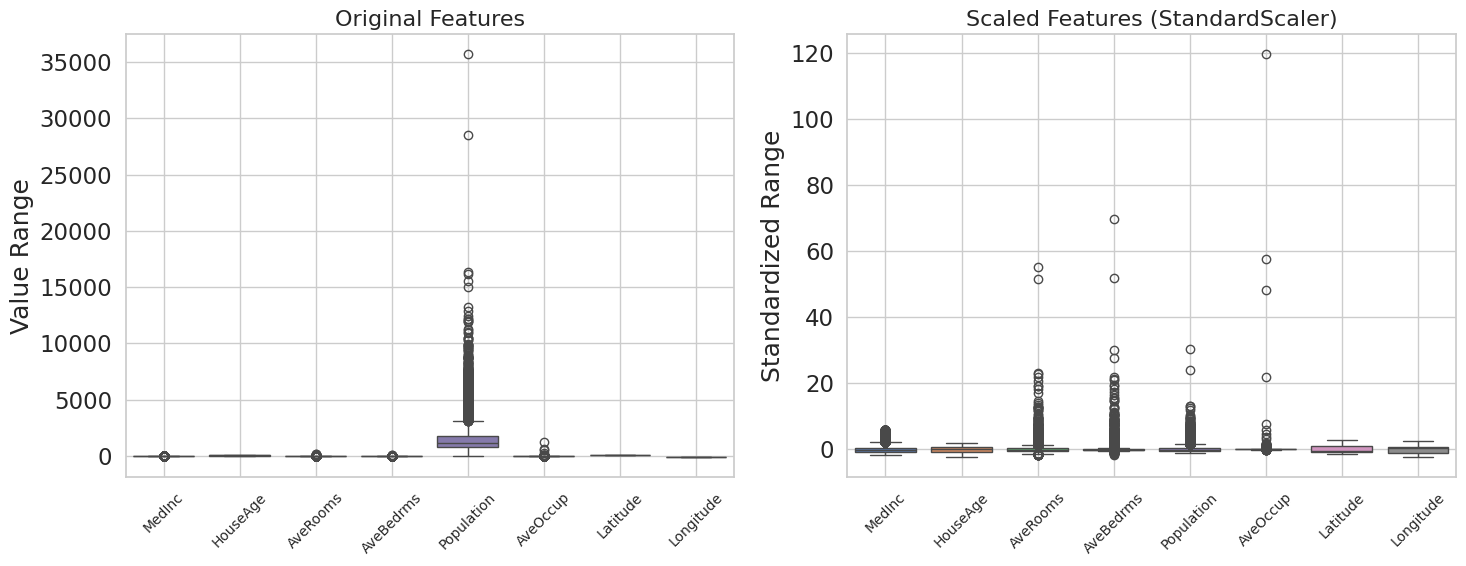

In [ ]:
# Plot original vs scaled data boxplots
plt.figure(figsize=(15,6))

# Original
plt.subplot(1, 2, 1)
sns.boxplot(data=X_df)
plt.title('Original Features', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Value Range')
plt.grid(True)

# Scaled
plt.subplot(1, 2, 2)
sns.boxplot(data=X_scaled_df)
plt.title('Scaled Features (StandardScaler)', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Standardized Range')
plt.grid(True)

plt.tight_layout()
plt.show()


### Train Test Split

In [ ]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [ ]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 10320
Validation set size: 6192
Test set size: 4128


Setting ```self.theta``` to ```None``` instead of ```0``` in a class initialization often indicates that the parameter theta has not yet been initialized or estimated.

### Linear Regression

In [ ]:
# Define Linear Regression with Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.mse_history_train = []
        self.mse_history_val = []

    def fit(self, X_train, y_train, X_val, y_val):
        # Add intercept term to X
        X_train_b = self.add_intercept(X_train)
        X_val_b = self.add_intercept(X_val)
        m, n = X_train_b.shape
        self.theta = np.zeros(n)

        # Gradient Descent
        for _ in range(self.iterations):
            predictions_train = self.predict(X_train_b)
            errors_train = predictions_train - y_train
            gradients = (2 / m) * X_train_b.T.dot(errors_train)
            self.theta -= self.learning_rate * gradients

            # Compute and store MSE for training and validation sets
            mse_train = self.compute_mse(y_train, predictions_train)
            self.mse_history_train.append(mse_train)

            predictions_val = self.predict(X_val_b)
            mse_val = self.compute_mse(y_val, predictions_val)
            self.mse_history_val.append(mse_val)

    def predict(self, X):
        return X.dot(self.theta)

    def compute_mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def get_mse_history(self):
        return self.mse_history_train, self.mse_history_val

    def add_intercept(self, X):
        return np.c_[np.ones(X.shape[0]), X] # Prepends a column of ones to the array X, often used to add an intercept term to the feature matrix.

# Compute parameters using the normal equation
def normal_equation(X, y):
    X_b = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
    return inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Create and fit the model
model = LinearRegressionGD(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train, X_val, y_val)

### Loss Plot

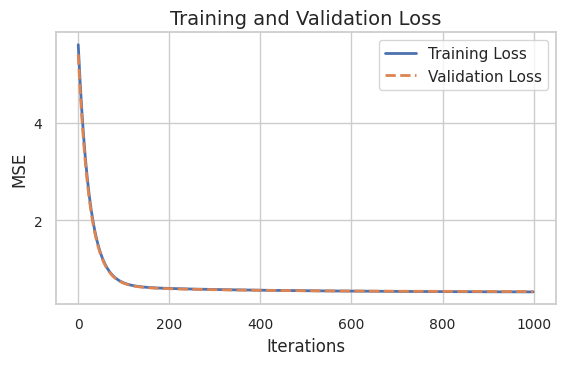

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(6, 4))  # Slightly larger for better spacing

plt.plot(model.get_mse_history()[0], label='Training Loss', linewidth=2)
plt.plot(model.get_mse_history()[1], label='Validation Loss', linestyle='--', linewidth=2)

# Set axis labels and title with font sizes
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14)

# Tick label sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Legend with font size
plt.legend(fontsize=11)

# Improve layout
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate on the test set using gradient descent
X_test_b = model.add_intercept(X_test)
test_predictions = model.predict(X_test_b)
test_mse = model.compute_mse(y_test, test_predictions)
print(f'Test MSE (Gradient Descent): {test_mse}')

# Compute optimal parameters using normal equation
theta_normal = normal_equation(X_train, y_train)

# Evaluate on the test set using normal equation
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # Add intercept term to X_test
test_predictions_normal = X_test_bias.dot(theta_normal)
test_mse_normal = mean_squared_error(y_test, test_predictions_normal)
print(f'Test MSE (Normal Equation): {test_mse_normal}')

Test MSE (Gradient Descent): 0.5324084380556544
Test MSE (Normal Equation): 0.524456362872915


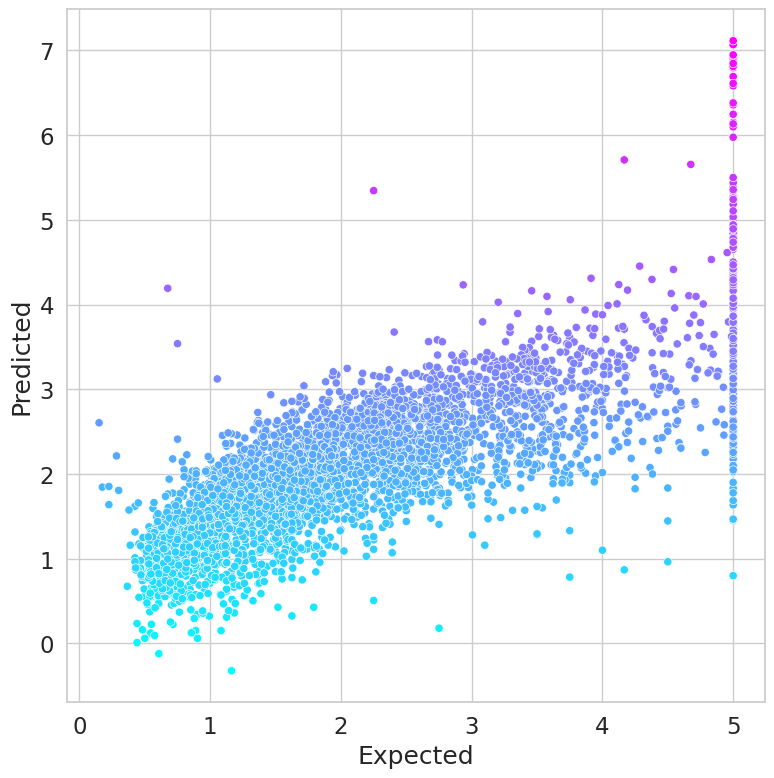

In [ ]:
#Visualizing the Expected vs. Predicted Prices
df = pd.DataFrame()
df['Expected'] = pd.Series(y_test)
df['Predicted'] = pd.Series(test_predictions)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)

### **Linear Regression using scikit-learn package**

In [ ]:
# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE with the Original Features: {mse:.4f}')

MSE with the Original Features: 0.5245


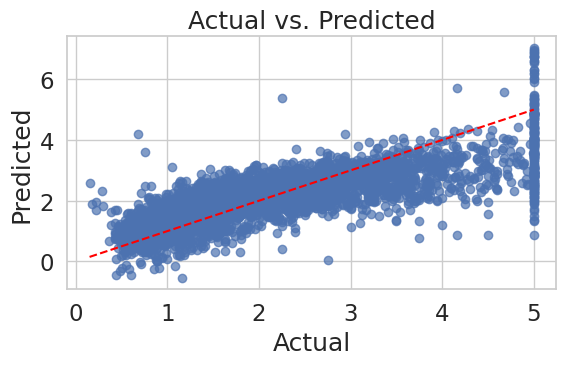

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

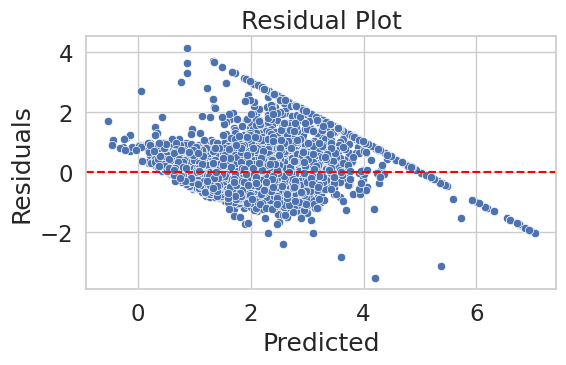

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

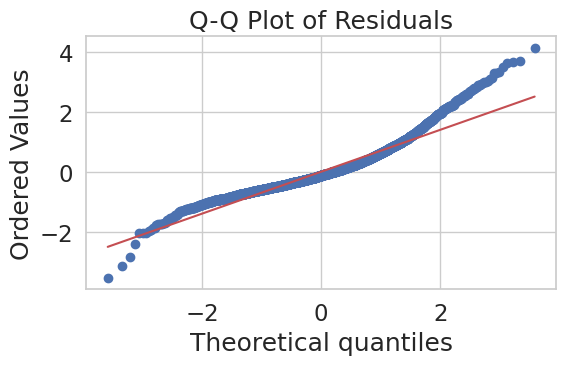

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

### Some of the Important concepts

In [ ]:
# Illustrate Underfitting (using a random subset of features)
np.random.seed(42)
feature_indices = np.random.choice(X_train.shape[1], 5, replace=False)# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
X_train_subset = X_train[:, feature_indices]
X_test_subset = X_test[:, feature_indices]
subset_model = LinearRegression()
subset_model.fit(X_train_subset, y_train)
y_pred_subset = subset_model.predict(X_test_subset)
mse_subset = mean_squared_error(y_test, y_pred_subset)
print(f'MSE with Subset of Features: {mse_subset:.4f}')

# Illustrate Overfitting (using polynomial features) - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
print("Shape of X_train_poly", X_train_poly.shape)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'MSE with Polynomial Features: {mse_poly:.4f}')


MSE with Subset of Features: 0.6493
Shape of X_train_poly (10320, 495)
MSE with Polynomial Features: 1.0924


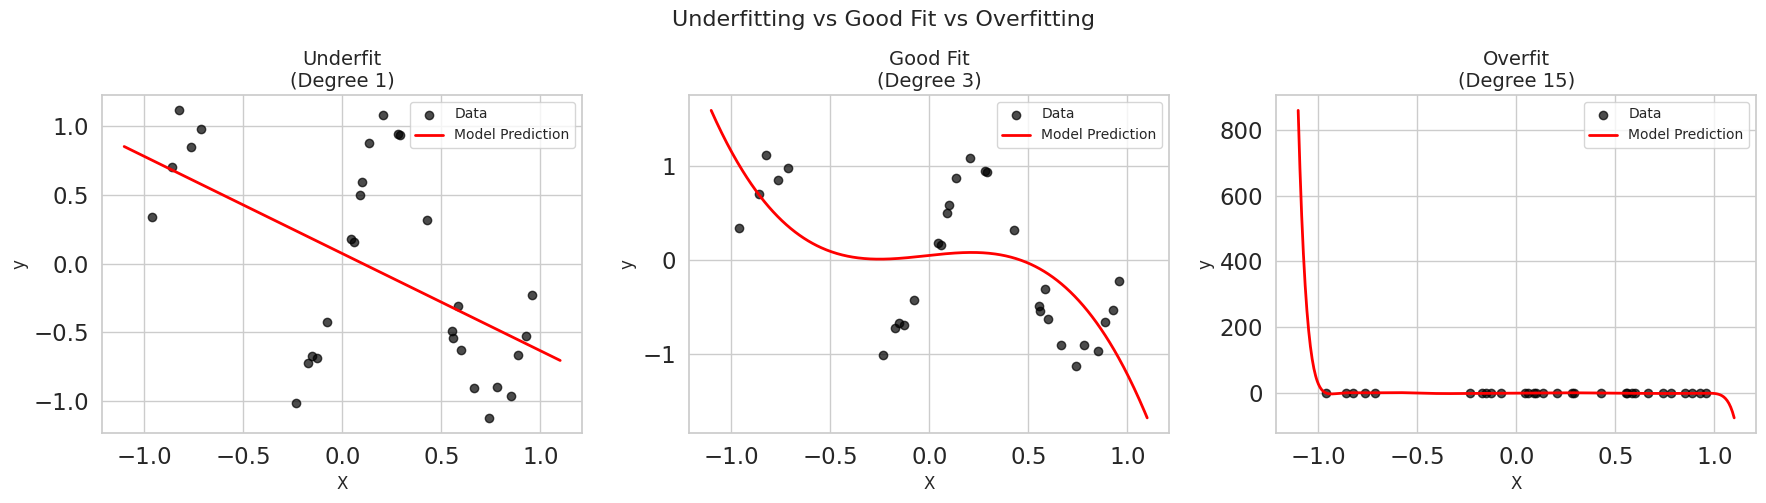

In [ ]:
# Generate synthetic 1D dataset
np.random.seed(0)
X = np.sort(np.random.rand(30) * 2 - 1)  # X in [-1, 1]
y = np.sin(2 * np.pi * X) + 0.1 * np.random.randn(30)

X = X.reshape(-1, 1)

# Define models with varying complexity
models = [
    ("Underfit\n(Degree 1)", make_pipeline(PolynomialFeatures(1), LinearRegression())),
    ("Good Fit\n(Degree 3)", make_pipeline(PolynomialFeatures(3), LinearRegression())),
    ("Overfit\n(Degree 15)", make_pipeline(PolynomialFeatures(15), LinearRegression()))
]

# Create a smoother input range for predictions
X_test = np.linspace(-1.1, 1.1, 500).reshape(-1, 1)

# Setup larger figure with appropriate aspect ratio
plt.figure(figsize=(18, 5))

for i, (title, model) in enumerate(models, 1):
    model.fit(X, y)
    y_pred = model.predict(X_test)

    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='black', label='Data', alpha=0.7)
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Model Prediction')
    plt.title(title, fontsize=14)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.grid(True)
    plt.legend(fontsize=10)
    plt.tight_layout()

plt.suptitle("Underfitting vs Good Fit vs Overfitting", fontsize=16, y=1.02)
plt.subplots_adjust(top=0.85)  # Adjust spacing above subplots
plt.show()


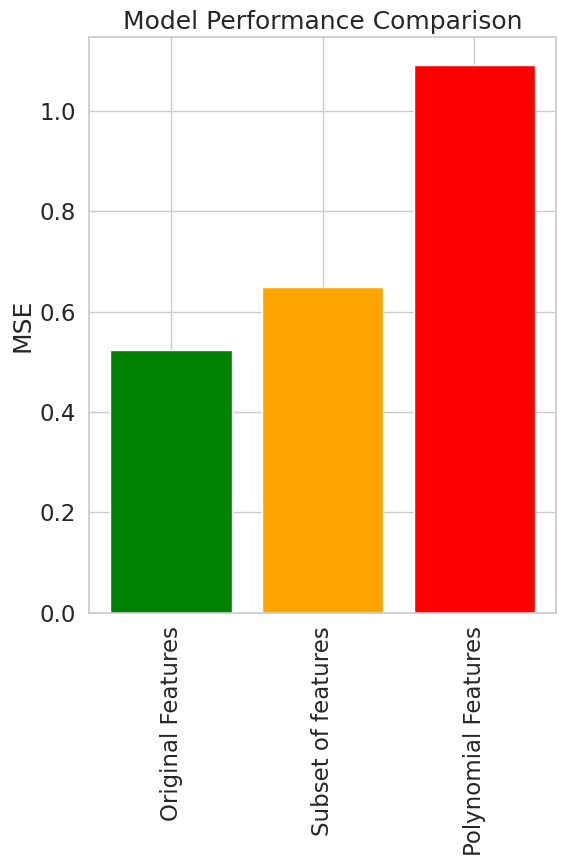

In [ ]:
# Plotting the results
models = ['Original Features', 'Subset of features', 'Polynomial Features']
mse_values = [mse, mse_subset, mse_poly]

# Plotting
plt.figure(figsize=(6, 9))
plt.bar(models, mse_values, color=['green', 'orange', 'red'])
plt.ylabel('MSE')
plt.title('Model Performance Comparison')

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.tight_layout()  # Adjusts layout to prevent clipping
plt.show()

In [ ]:
X_train.shape[1]

8

In [ ]:
feature_indices

array([1, 5, 0, 7, 2])

## **Assignment - 2**

### Total marks: 20

1. Load the Iris dataset from scikit-learn: https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html [MARKS 1]


In [ ]:
# Solution Code

### 2. Show the class distribution of the dataset using a bar graph. Is the dataset balanced? [Marks 1]

In [ ]:
# Solution Code

### 3. Encode the class labels as one-hot vectors. [Marks 1]

In [ ]:
# Solution Code

### 4. Split the data into training, validation, and test sets (70%-15%-15%). [Marks 1]

In [ ]:
# Solution Code

### 5. Preprocess the dataset as required, i.e. feature scaling or standardization [Marks 1]

In [ ]:
# Solution Code

### 6. Implement a softmax (multinomial) logistic regression model from scratch. [Marks 1]

In [ ]:
# Solution Code

### 7. Using cross entropy as loss and apply L2 regularization weights in the cost function and train the softmax logistic regression model with gradient descent.
- Use cross validation to find a suitable value of the learning rate and regularization parameter.
- Also give the training and validation loss vs. training epochs plot.
  - learning_rates = (10^-3, 10^-1; 5 values) <br>
  - reg_lambdas = (10^-4, 10^-1; 4 values)
- Range of values for learning rate and regularization strength
  [Marks 6]

In [ ]:
# Solution Code

### 8. Report the prediction performance of your implementation on the test set in terms of confusion matrix, precision, recall and area under precision recall curve. [Marks 2]

In [ ]:
# Solution Code

### 9. Fit a logistic regression model using scikit-learn's Logistic Regression model https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Use multi-class=’multinomial’ and penalty =’l2’ and the parameter C to be equal to the inverse of the regularization parameter that you found through cross validation. [Marks 4]

In [ ]:
# Solution Code

### 10. Compare the performance of your custom logistic regression model with scikit learn in terms of accuracy, precision, recall and area under precision-recall curve. [Marks 2]

In [ ]:
# Solution Code